# MODELO DE COMPORTAMIENTO DE CONDUCTORES Y LA GENERACIÓN DE ACCIDENTES DE TRÁNSITO
Wilson Arias Rojas <wiariasro@unal.edu.co>



Modelar el comportamiento de conductores de vehiculos para analizar como las conductas riesgosas conllevan a la generación de accidentes de tránsito utilizando datos obtenidos de un simulador de conducción.

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/ModComp1.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/ModComp2.jpg)

Aprendizaje por refuerzo o Aprendizaje reforzado (en inglés reinforcement learning) es un área del aprendizaje automático inspirada en la psicología conductista (conductismo) https://es.wikipedia.org/wiki/Aprendizaje_por_refuerzo

Conductismo https://es.wikipedia.org/wiki/Aprendizaje_por_refuerzo


![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/ModComp3.jpg)


![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/ModComp4.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/ModComp5.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/ModComp6.jpg)

Modeling and Prediction of Human Behavior, Pentland and Liu, MIT 2019 
http://www.mit.edu/~amliu/Papers/PentlandLiu_NeuralComp99_v11n2.pdf

## Simulador de conducción 
Se construyo un simulador (computador +GPUs, pantallas , silla, timon - pedales, caja de cambios) y se cofiguro para que fucnionara con el software de simualcion de conducción de Foerst https://www.fahrsimulatoren.eu/en/light-vehicle. Para una revisión actualizada de simuladores de conducción ver https://en.https://en.wikipedia.org/wiki/Driving_simulator.

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/sim1.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/sim2.jpg)

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/sim3.jpg)



##Conductas riesgosas
En este trabajo se modelaron las conductas riesgosas enviando mensajes de whapsapp al celular de individuo durante el experimeto de conducion en el simualdor. Se enviaron mensasjes de texto en tiempos aleatorios con una distibucion de tipo proceso de Posssioncon una media aporx. de 3 msgs x min (alrededor 30 msgs durante los 10 mins de duraccion del experimento en el simulador de conducción que hace cada indivuduo).

##Variables regsitradas para cada individuo 
- Genero
- Edad
- Estrato
- NivelEd 
- Accidente: 1 si ocurren acidentes durante los 10 mins de experimento en el simulador de conducción que hace cada indivuduo y 0 en caso contrario.
- Funcion de Concentracion Instantánea FCI: [0s ,10mins] -> R, el nivel de concentración se regsitra con un MindWave™ Headset https://store.neurosky.com/pages/mindwave el cual obtiene alrededor de 25000 muestras en los 10 mins de experimento en el simulador de conducción que hace cada indivuduo.

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/MindWave.jpg)

 

MindWave™ HeadsetMeasures:
- Outputs 12 bit Raw-Brainwaves (3 - 100Hz) with Sampling rate at 512Hz
- Outputs EEG power spectrums (Alpha, Beta, etc.)
- Outputs NeuroSky proprietary eSense meter such as Attention, Meditation, and other future meters
- EEG/ECG signal quality analysis (can be used to detect poor contact and whether the device is off the head)

Banda de Frecuencias de Neurosky Think Gear EEG
- Delta (1 - 3 HZ)
- Theta (4-7 HZ)
- Low Alpha (8-9 HZ)
- High Alpha (10-12 HZ)
- Low Beta (13-17 HZ)
- High Beta (18-30 HZ)
- Low Gamma (31-40 HZ)
- High Gamma (41-50 HZ)

##Representación del Espacio funcional de Funciones de Concentracion Instantánea EFCI:
Se usa la base de Wavelets de Haar paraEspacio funcional de Funciones de Concentracion Instantánea EFCI, esta representación permite obtener representaciones en diferentes niveles de resolución en tiempo  https://astrostatistics.psu.edu/su05/moudden1_061305.ppt

![picture](https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WaveletsMultiresolution.png)

#Individuos que realizaron el experimento
Se logro relaizar el experimeto de conducion de 10 minutos en simulador de conducción para 167 indivisduos abajo se ve un analisis de esta poblacion de individuos.


##Conclusiones
Se encontro que con solo el coeficiente 0 de Wavelets de Haar de la Funcion de Concentracion Instantánea FCI (el promedio de la función)  tres modelos predictivos de de aprendizaje de maquina (regresion logistica, GLM binarios, Arboles de Decision obtenido usando AutoML) son capaces predecir con validacion cruzada 5-fold la ocurrencia de acidentes en el experimento con una precision de 100%.

In [5]:
# Install tpot on the server
!pip install tpot

In [6]:
!pip install h2o

In [3]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Demographic and ConcProm variables

In [4]:
# Upload the files WARX_DP.csv and WARY.csv in in \content\ 
X = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
y = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

print('X: ', X.shape)
print('y: ', y.shape)



X_aux = X.drop('ConcProm', axis=1)
print('X_aux: ', X_aux.shape)

p_1=[25.09000333,43.54735361,40.93533094,57.72706397,47.5288344,60.02000074,71.30890033,41.97318419,70.19685914,67.25804659,67.25804659,37.215045,44.20274825,44.9482203,40.29145524,47.5288344,50.97962888,66.79584429,34.75013889,50.91603393,47.66795066,59.08915145,39.87920147,40.63371544,60.83605252,50.00285194,42.3649512,46.54499157,44.56747347,49.57464737,42.77915985,36.70727492,46.83959381,44.69489799,56.36433223,49.26550202,34.31257138,57.35738757,48.1933393,72.97536961,45.39976542,47.07975555,48.70832433,52.27300225,49.78067224,60.63242693,26.65721164,49.56356678,48.27939134,21.81681533,42.9938887,57.18099324,12.17614741,24.61955616,42.94873299,46.1628754,49.14954165,51.96101732,65.72113337,52.11842958,57.18099324,58.02188339,48.7985123,75.54057224,51.07006389,49.78067224,41.91481219,54.41837711,57.35738757,44.19451218,18.8140992,61.95965925,49.01848822,53.60224081,39.40220377,57.2788049,41.75523936,26.81156826,52.11842958,53.60224081,56.88268156,67.12722615,57.20074694,42.38433285,34.48368777,47.02401309,48.07219359,47.93922652,54.76789407,43.89163246,45.39853082,61.0840458,51.56449273,72.59770363,40.546807,59.11333683,48.46467484,45.16000494,60.48411988,58.7366894,42.51257755,52.55430723,37.08185438,54.38532053,61.43337757,50.72977561,46.0047841,42.38433285,63.02101917,61.95965925,48.07219359,36.65464983,69.2054693,40.546807,52.55378252,37.19932714,54.76789407,54.90501615,26.21834007,49.70199698,45.92792987,50.91603393,61.95965925,59.42519831,59.18170314,38.41634001,45.10349085,39.69875613,59.05598938,54.44677305,47.75159727,53.33112133,54.30195376,53.18577734,55.93413377,62.63418624,54.90632427,48.04549523,49.2707491,35.32664588,70.4368962,51.70921942,46.9029291,49.24062471,59.54242415,53.00327171,53.00327171,56.97382635,30.11827526,55.93771413,36.71755301,21.73298559,46.00879657,0,56.97382635,42.12546684,50.39825303,50.39825303,30.05956974,26.91197259,66.21404982,39.97950554,38.38883916,56.97382635,7.633908454,34.55939998,59.54242415]

X_aux["ConcProm"] =  pd.Series(p_1)
print('X_aux: ', X_aux.shape)
X = X_aux
X_aux = X.drop('ConcProm', axis=1)
ConcProm = X["ConcProm"]
print('ConcProm: ', ConcProm.shape)
'''
split = int(0.8*len(X))

X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

print('X_train: ', X_train.shape)
print('X_test:  ', X_test.shape)
print('y_train: ',  y_train.shape)
print('y_test:  ', y_test.shape)
'''


X:  (167, 5)
y:  (167, 1)
X_aux:  (167, 4)
X_aux:  (167, 5)
ConcProm:  (167,)


"\nsplit = int(0.8*len(X))\n\nX_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]\n\nprint('X_train: ', X_train.shape)\nprint('X_test:  ', X_test.shape)\nprint('y_train: ',  y_train.shape)\nprint('y_test:  ', y_test.shape)\n"

In [5]:
X

,Genero,Edad,Estrato,NivelEd,ConcProm
0,0,21,2,4,25.090003
1,1,72,3,4,43.547354
2,0,47,1,0,40.935331
3,0,43,2,2,57.727064
4,0,33,3,4,47.528834
...,...,...,...,...,...
162,0,20,4,4,38.388839
163,0,18,4,4,56.973826
164,0,18,2,4,7.633908
165,0,34,3,2,34.559400


In [6]:
X_aux

,Genero,Edad,Estrato,NivelEd
0,0,21,2,4
1,1,72,3,4
2,0,47,1,0
3,0,43,2,2
4,0,33,3,4
...,...,...,...,...
162,0,20,4,4
163,0,18,4,4
164,0,18,2,4
165,0,34,3,2


In [7]:
ConcProm

0      25.090003
1      43.547354
2      40.935331
3      57.727064
4      47.528834
         ...    
162    38.388839
163    56.973826
164     7.633908
165    34.559400
166    59.542424
Name: ConcProm, Length: 167, dtype: float64

In [8]:
import matplotlib.pyplot as plt

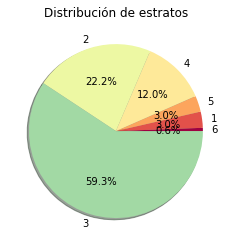

In [62]:
pie_data = X.groupby('Estrato').agg('count')
labels = pie_data["Edad"].sort_values().index 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pie_data["Edad"].sort_values(), labels=labels, autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Distribución de estratos')
plt.show()

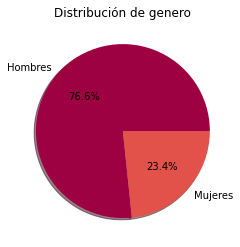

In [9]:
pie_data = X.groupby("Genero").agg('count')
labels = ["Hombres","Mujeres"]
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pie_data["Edad"], labels=labels, autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Distribución de genero')
plt.show()

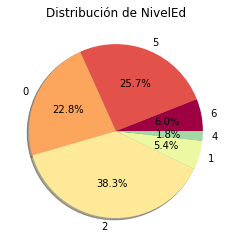

,Genero,Edad,Estrato,ConcProm
NivelEd,,,,
0,10,10,10,10
1,43,43,43,43
2,38,38,38,38
4,64,64,64,64
5,9,9,9,9
6,3,3,3,3


In [10]:
pie_data = X.groupby("NivelEd").agg('count')
labels = pie_data["Edad"].sort_values().index 
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.pie(pie_data["Edad"], labels=labels, autopct='%1.1f%%',shadow=True, colors=colors)
plt.title('Distribución de NivelEd')
plt.show()
pie_data

(0.0, 40.0)

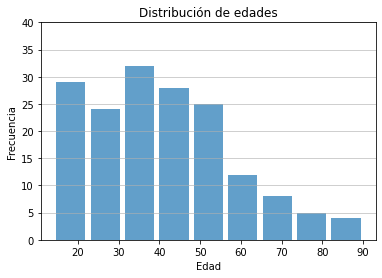

In [11]:
n, bins, patches = plt.hist(x=X["Edad"], bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

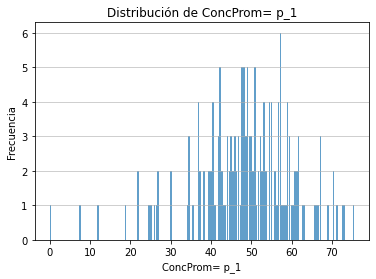

In [13]:
n, bins, patches = plt.hist(x=X["ConcProm"],bins=167, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('ConcProm= p_1')
plt.ylabel('Frecuencia')
plt.title('Distribución de ConcProm= p_1')
maxfreq = n.max()
# Set a clean upper y-axis limit.

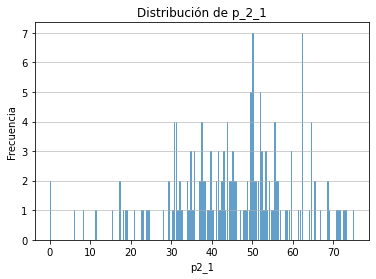

In [14]:
p2_1=[18.78279873,39.5987851,34.07867249,55.15334469,41.11860138,54.80724498,73.19979258,24.30617083,64.65967849,68.51329728,68.51329728,34.30898585,45.34958145,29.38706571,32.26513075,41.11860138,44.88569524,71.27920587,31.62782428,45.08659901,59.15415957,64.49537003,38.2057854,41.64965369,58.13070854,49.5913182,38.78936257,42.75576873,44.97007297,47.89641336,31.41372924,28.34372492,59.46805358,39.91382184,61.67565899,45.73177357,31.48817828,49.65800358,46.36205939,72.48249892,35.88221495,37.36347923,51.96438052,49.82782888,51.01790234,64.58528304,18.07173282,30.59830854,42.98709797,24.60929687,34.74090993,55.89443793,6.298475215,22.79467868,37.86918946,30.68954874,38.6969566,50.16828199,64.66584357,50.18791283,55.89443793,53.65429965,33.83140935,69.20439533,49.70664856,51.01790234,34.66448546,49.29230199,49.65800358,38.65825051,17.18272733,62.15735539,32.66386814,53.55367615,31.0692018,52.46688067,15.59719736,11.57164022,50.18791283,53.55367615,52.64621273,65.55805914,55.66374468,41.76233101,29.39360454,50.01790234,44.28588184,51.93660102,55.55552812,31.45589234,35.69103031,48.67800482,48.67386876,71.04407679,37.42354466,54.32464967,48.38971541,43.9800605,64.26476943,52.9672202,42.42385332,51.32946478,37.28699302,43.05784308,61.51280943,47.17871474,30.85357121,41.76233101,59.80356812,62.15735539,44.28588184,39.86283104,66.95561454,37.42354466,56.43582937,30.66541145,55.55552812,58.78201931,8.304710167,43.2643373,40.11889623,45.08659901,62.15735539,65.40132107,50.08722761,34.80140749,43.88925242,45.79041916,55.72529168,59.62497685,52.49854929,57.06821409,54.15599728,50.40792642,43.10661152,62.19791345,51.38175196,53.49083277,37.13914439,32.11759985,72.01512439,56.55497253,46.14661399,50.17587505,50.81974196,51.77578863,51.77578863,62.39811099,17.49077104,52.19470338,35.70201864,19.11278474,42.14081116,0,62.39811099,37.38965368,43.74041608,43.74041608,35.20402494,20.71405642,75.17377616,39.76603494,23.22587814,62.39811099,0,30.63794061,50.81974196]

n, bins, patches = plt.hist(x=p2_1,bins=167, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('p2_1')
plt.ylabel('Frecuencia')
plt.title('Distribución de p_2_1')
maxfreq = n.max()

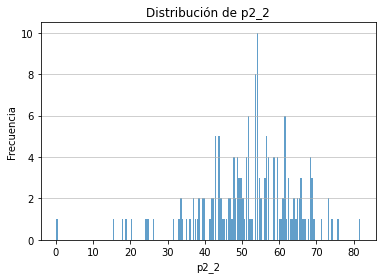

In [15]:
p2_2=[31.39674074,47.49562963,47.79148148,60.30059259,53.93859259,65.23237037,69.41814815,59.63888889,75.73362963,66.00288889,66.00288889,40.12088889,43.056,60.50822222,48.31718519,53.93859259,57.07311111,62.31281481,37.87222222,56.74503704,36.18259259,53.68333333,41.55255556,39.61781481,63.5412963,50.56792593,45.94040741,50.33407407,44.16488889,51.25277778,54.14388889,45.07030864,34.21191358,49.47567901,51.05333333,52.79901235,37.13679012,65.0562963,50.02450617,73.46820988,54.9167284,56.7954321,45.45246914,54.71802469,48.54351852,56.67981481,35.24216049,68.52765432,53.57135802,19.02450617,51.24635802,58.46746914,18.05345679,26.44432099,48.02796296,61.63524691,59.60148148,53.75364198,66.77635802,54.04882716,58.46746914,62.38919753,63.76469136,81.87635802,52.43339506,48.54351852,49.16469136,59.5441358,65.0562963,49.7304321,20.44537037,61.76197531,65.37209877,53.65080247,47.73469136,62.0904321,67.91166667,42.05055556,54.04882716,53.65080247,61.11888889,68.6962963,58.73765432,43.0062963,39.57345679,44.03030864,51.8582716,43.94209877,53.98030864,56.32660494,55.1054321,73.48932099,54.45493827,74.15123457,43.66987654,63.9017284,48.53962963,46.33987654,56.7037037,64.50580247,42.6012963,53.77907407,36.8767284,65.71209877,61.35395062,54.28061728,61.15506173,43.0062963,66.2382716,61.76197531,51.8582716,33.44666667,71.45518519,43.66987654,48.67197531,43.73283951,53.98030864,51.02826087,44.1308642,56.13925926,51.73660494,56.74503704,61.76197531,53.44944444,68.27561728,42.03104938,46.31765432,33.60746914,62.38648148,49.26888889,43.00493827,49.59425926,54.44790123,55.96345679,68.7608642,63.0704321,58.43067901,42.60049383,61.40160494,38.53549383,68.85876543,46.86376543,47.65919753,48.3054321,68.2645679,54.23067901,54.23067901,51.54987654,42.745,59.68049383,37.73302469,24.35302469,49.87654321,0,51.54987654,46.86098765,57.05567901,57.05567901,24.9154321,33.10950617,57.25487654,40.19296296,53.5508642,51.54987654,15.26734568,38.48061728,68.2645679]

n, bins, patches = plt.hist(x=p2_2,bins=167, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('p2_2')
plt.ylabel('Frecuencia')
plt.title('Distribución de p2_2')
maxfreq = n.max()

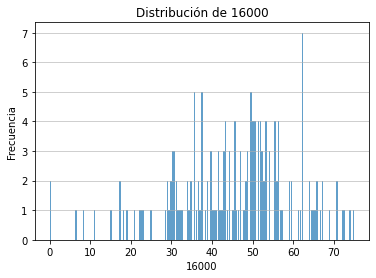

In [18]:
p16000=[22.48046997,40.50609337,36.29560652,54.3456034,46.80194988,56.17186426,74.05549653,28.93775389,66.03631023,67.18423849,67.18423849,35.66802075,43.50315605,30.53827886,34.05405912,46.80194988,45.21954878,70.89494407,29.96400225,45.76845197,56.4655334,64.13180426,39.01537404,29.12199238,56.28060746,41.73570402,36.69408162,41.04537216,47.64783451,48.29110681,31.34460346,28.3232298,59.25110931,39.73951628,61.57265171,45.37610149,31.51896756,49.49290669,46.43103556,72.42659834,35.53427911,37.4544716,51.81526155,49.82569839,51.47597025,64.84001,18.29535654,30.01174927,42.98693832,24.91381789,34.55209049,55.76938941,6.376413974,22.33429161,37.37260171,30.37635148,38.784076,50.29410662,64.6864571,50.31398038,55.76938941,53.31591776,33.77982626,69.0895569,49.66589588,51.47597025,34.77170177,48.8751953,49.49290669,38.50440597,17.2527342,62.20292482,32.47703269,53.4367852,30.80982439,52.16330229,15.20861196,11.00949941,50.31398038,53.4367852,52.30023124,65.55259046,55.67102056,41.38591338,29.47272045,49.84188488,44.30179364,51.86738329,55.31491782,31.17842635,35.50159365,48.26117118,48.68220736,70.83426036,37.3455409,54.2495469,48.58633835,44.42528592,64.03449784,52.75645272,42.57083932,51.25173427,37.46378351,43.05205925,61.51915505,46.76838948,30.6655834,41.38591338,59.67739516,62.20292482,44.30179364,39.66314605,66.6751453,37.3455409,56.37935129,30.52515468,55.31491782,59.12080495,8.357977626,43.14386601,40.0832448,45.76845197,62.20292482,65.68039498,50.41003687,34.77420161,43.85075933,45.61383664,55.62289857,59.7440785,52.87332042,57.27942004,54.12855447,50.33872883,42.8975689,62.28210737,51.39547528,53.23704768,36.78201362,31.98293857,72.0895569,56.61864883,46.04943441,50.08130742,50.61227423,51.76063996,51.76063996,62.41541154,17.51234298,52.20948691,35.88381976,19.1760515,41.90369352,0,62.41541154,37.18898819,43.44572214,43.44572214,35.50646835,20.92500469,75.02743579,39.72189238,23.01268671,62.41541154,0,30.5839635,50.61227423]

n, bins, patches = plt.hist(x=p16000,bins=167, alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('16000')
plt.ylabel('Frecuencia')
plt.title('Distribución de 16000')
maxfreq = n.max()

In the code below, we convert *y* to numpy arrays. This is not strictly necessary, but the labels should be converted to a one-dimensional vector (using reshape in the code below) or Scikit-Learn will show a warning message.

In [19]:
X=np.array(X)
X_aux=np.array(X_aux)
ConcProm= np.array(ConcProm)

y = np.array(y).reshape((-1,))

In [20]:
# https://realpython.com/logistic-regression-python/
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())
print(result.summary2())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.637798
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  167
Model:                          Logit   Df Residuals:                      162
Method:                           MLE   Df Model:                            4
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.07964
Time:                        02:27:41   Log-Likelihood:                -106.51
converged:                       True   LL-Null:                       -115.73
Covariance Type:            nonrobust   LLR p-value:                  0.001015
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2308      0.384     -0.601      0.548      -0.983       0.521
x2            -0.0095      0.

In [21]:
predicted = result.predict(X,linear=False)
P=[]
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] >= 0.5:
      P.append(1)
      if  y[i] == 1:
         c= c+1
    else: 
      P.append(0)
      if  y[i] == 0:
         c= c+1
print(np.array(P))
print(c/len(predicted))

[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
[0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0]
0.6407185628742516


In [22]:
logit_model=sm.Logit(y,X_aux)
result=logit_model.fit()
print(result.summary())
print(result.summary2())
predicted = result.predict(X_aux)
P=[]
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] >= 0.5:
      P.append(1)
      if  y[i] == 1:
         c= c+1
    else: 
      P.append(0)
      if  y[i] == 0:
         c= c+1
print(np.array(P))
print(c/len(predicted))

Optimization terminated successfully.
         Current function value: 0.687061
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  167
Model:                          Logit   Df Residuals:                      163
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                0.008549
Time:                        02:27:46   Log-Likelihood:                -114.74
converged:                       True   LL-Null:                       -115.73
Covariance Type:            nonrobust   LLR p-value:                    0.5768
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1542      0.368     -0.419      0.675      -0.876       0.567
x2             0.0104      0.

In [23]:
logit_model=sm.Logit(y,ConcProm)
result=logit_model.fit()
print(result.summary())
print(result.summary2())
predicted = result.predict(ConcProm)
P=[]
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] >= 0.5:
      P.append(1)
      if  y[i] == 1:
         c= c+1
    else: 
      P.append(0)
      if  y[i] == 0:
         c= c+1
print(np.array(P))
print(c/len(predicted))

Optimization terminated successfully.
         Current function value: 0.690009
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  167
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            0
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                0.004295
Time:                        02:27:49   Log-Likelihood:                -115.23
converged:                       True   LL-Null:                       -115.73
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0032      0.003      1.022      0.307      -0.003       0.009
                        Resul

In [24]:
# https://blog.quantinsti.com/machine-learning-logistic-regression-python/

# Import LogisticRegression sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

SK_logistic_model = LogisticRegression()
SK_logistic_model = SK_logistic_model.fit (X,y)

In [25]:
SK_logistic_model.classes_

array([0, 1])

In [26]:
SK_logistic_model.intercept_

array([-0.40300085])

In [27]:
SK_logistic_model.coef_

array([[-0.19270783, -0.00810493, -0.5416187 ,  0.00912208,  0.0485678 ]])

calculate the probabilities of ecah class for the test dataset using 
‘predict_proba’ function.

In [28]:
probability = SK_logistic_model.predict_proba(X)
print(probability)

[[0.59902091 0.40097909]
 [0.65760339 0.34239661]
 [0.34015857 0.65984143]
 [0.27147135 0.72852865]
 [0.48761764 0.51238236]
 [0.53990523 0.46009477]
 [0.19997744 0.80002256]
 [0.40928772 0.59071228]
 [0.26294607 0.73705393]
 [0.31901512 0.68098488]
 [0.31201381 0.68798619]
 [0.54047464 0.45952536]
 [0.45156467 0.54843533]
 [0.30813448 0.69186552]
 [0.65190018 0.34809982]
 [0.44864227 0.55135773]
 [0.30051252 0.69948748]
 [0.31838896 0.68161104]
 [0.54046261 0.45953739]
 [0.33633468 0.66366532]
 [0.45439621 0.54560379]
 [0.41107527 0.58892473]
 [0.63956184 0.36043816]
 [0.5091842  0.4908158 ]
 [0.24583695 0.75416305]
 [0.42878548 0.57121452]
 [0.51247685 0.48752315]
 [0.55210898 0.44789102]
 [0.68256502 0.31743498]
 [0.75412791 0.24587209]
 [0.52095835 0.47904165]
 [0.64742804 0.35257196]
 [0.53089894 0.46910106]
 [0.53009314 0.46990686]
 [0.5255941  0.4744059 ]
 [0.34891239 0.65108761]
 [0.6779853  0.3220147 ]
 [0.40003559 0.59996441]
 [0.62988717 0.37011283]
 [0.13045596 0.86954404]


In [29]:
predicted = SK_logistic_model.predict(X)
print(predicted)
print(y)
print(SK_logistic_model.score(X,y))

[0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0
 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.6467065868263473


In [30]:
predicted = SK_logistic_model.predict(X)
print(metrics.confusion_matrix(y, predicted))
print(metrics.classification_report(y, predicted))

[[48 34]
 [25 60]]
              precision    recall  f1-score   support

           0       0.66      0.59      0.62        82
           1       0.64      0.71      0.67        85

    accuracy                           0.65       167
   macro avg       0.65      0.65      0.64       167
weighted avg       0.65      0.65      0.65       167



In [31]:
cross_val5 = cross_val_score(SK_logistic_model, X, y, scoring='accuracy', cv=5)
print(cross_val5)
print(cross_val5.mean())

cross_val10 = cross_val_score(SK_logistic_model, X, y, scoring='accuracy', cv=10)
print(cross_val10)
print(cross_val10.mean())

[0.64705882 0.41176471 0.72727273 0.57575758 0.60606061]
0.5935828877005347
[0.64705882 0.64705882 0.58823529 0.47058824 0.52941176 0.64705882
 0.64705882 0.5625     0.5        0.625     ]
0.5863970588235293


In [32]:
SK_logistic_model = LogisticRegression()
SK_logistic_model = SK_logistic_model.fit (X_aux,y)
predicted = SK_logistic_model.predict(X_aux)
print(predicted)
print(y)
print(SK_logistic_model.score(X_aux,y))

[1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0
 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.5508982035928144


In [33]:
ConcProm= np.array(ConcProm).reshape((-1,1,)) 
SK_logistic_model = LogisticRegression()
SK_logistic_model = SK_logistic_model.fit (ConcProm,y)
predicted = SK_logistic_model.predict(ConcProm)
print(predicted)
print(y)
print(SK_logistic_model.score(ConcProm,y))
SK_logistic_model.coef_

[0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0
 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.6047904191616766


array([[0.04600697]])

In [34]:
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp38hqusxu
  JVM stdout: /tmp/tmp38hqusxu/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp38hqusxu/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_ge6g1w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


train  (167, 6)
Parse progress: |█████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1597199301027_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,13,13,9,py_4_sid_aa75




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.21500252745173512
RMSE: 0.46368365018807284
LogLoss: 0.6131865238610428
Null degrees of freedom: 166
Residual degrees of freedom: 153
Null deviance: 231.45726319250497
Residual deviance: 204.8042989695883
AIC: 232.8042989695883
AUC: 0.7035868005738881
AUCPR: 0.7137443858337494
Gini: 0.40717360114777623

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24886855587122897: 


,,0,1,Error,Rate
0,0,18.0,64.0,0.7805,(64.0/82.0)
1,1,1.0,84.0,0.0118,(1.0/85.0)
2,Total,19.0,148.0,0.3892,(65.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.248869,0.721030,146.0
1,max f2,0.248869,0.860656,146.0
2,max f0point5,0.530316,0.677966,80.0
3,max accuracy,0.530316,0.670659,80.0
4,max precision,0.937438,1.000000,0.0
5,max recall,0.193353,1.000000,155.0
6,max specificity,0.937438,1.000000,0.0
7,max absolute_mcc,0.530316,0.341750,80.0
8,max min_per_class_accuracy,0.530316,0.658824,80.0
9,max mean_per_class_accuracy,0.530316,0.670875,80.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 156.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,1.373670,0.000000,0.000000,0.000000,82.850465,0.000000,82.850465,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,1.281698,0.982353,0.491176,0.500000,1.323338,0.250000,42.086902,0.011765,0.011765,-1.764706,-50.882353,-0.024821
2,3,0.029940,1.268752,1.964706,0.785882,1.000000,1.274794,0.400000,33.924480,0.011765,0.023529,96.470588,-21.411765,-0.013056
3,4,0.041916,1.267902,0.982353,0.842017,0.500000,1.268486,0.428571,24.594196,0.011765,0.035294,-1.764706,-15.798319,-0.013486
4,5,0.053892,1.259527,1.964706,1.091503,1.000000,1.265296,0.555556,19.409996,0.023529,0.058824,96.470588,9.150327,0.010043
5,6,0.101796,1.023589,0.736765,0.924567,0.375000,1.148022,0.470588,10.816126,0.035294,0.094118,-26.323529,-7.543253,-0.015638
6,7,0.149701,0.815014,1.227941,1.021647,0.625000,0.916433,0.520000,7.648224,0.058824,0.152941,22.794118,2.164706,0.006600
7,8,0.203593,0.737208,0.654902,0.924567,0.333333,0.777231,0.470588,5.829432,0.035294,0.188235,-34.509804,-7.543253,-0.031277
8,9,0.299401,0.611603,0.859559,0.903765,0.437500,0.661188,0.460000,4.175594,0.082353,0.270588,-14.044118,-9.623529,-0.058680
9,10,0.401198,0.530994,1.155709,0.967691,0.588235,0.570174,0.492537,3.260786,0.117647,0.388235,15.570934,-3.230904,-0.026399




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.25952517914387063
RMSE: 0.5094361384353004
LogLoss: 0.9463711357809839
Null degrees of freedom: 166
Residual degrees of freedom: 154
Null deviance: 233.51261109991506
Residual deviance: 316.08795935085845
AIC: 342.08795935085845
AUC: 0.6005738880918221
AUCPR: 0.5771826556736878
Gini: 0.2011477761836442

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24787078576823499: 


,,0,1,Error,Rate
0,0,11.0,71.0,0.8659,(71.0/82.0)
1,1,5.0,80.0,0.0588,(5.0/85.0)
2,Total,16.0,151.0,0.4551,(76.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.247871,0.677966,150.0
1,max f2,0.000008,0.838264,166.0
2,max f0point5,0.439143,0.619048,109.0
3,max accuracy,0.439143,0.610778,109.0
4,max precision,0.728994,0.708333,23.0
5,max recall,0.000008,1.000000,166.0
6,max specificity,0.999995,0.987805,0.0
7,max absolute_mcc,0.439143,0.227660,109.0
8,max min_per_class_accuracy,0.507806,0.573171,83.0
9,max mean_per_class_accuracy,0.439143,0.607963,109.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 4910.44 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,310.117715,0.982353,0.982353,0.500000,310.309740,0.500000,310.309740,0.011765,0.011765,-1.764706,-1.764706,-0.000430
1,2,0.023952,309.674054,0.000000,0.491176,0.000000,309.986194,0.250000,310.147967,0.000000,0.011765,-100.000000,-50.882353,-0.024821
2,3,0.029940,309.210338,1.964706,0.785882,1.000000,309.213871,0.400000,309.961148,0.011765,0.023529,96.470588,-21.411765,-0.013056
3,4,0.041916,306.936533,0.000000,0.561345,0.000000,309.193428,0.285714,309.741799,0.000000,0.023529,-100.000000,-43.865546,-0.037446
4,5,0.053892,305.443331,0.982353,0.654902,0.500000,305.579247,0.333333,308.816788,0.011765,0.035294,-1.764706,-34.509804,-0.037877
5,6,0.101796,224.304694,1.473529,1.040138,0.750000,285.003564,0.529412,297.610565,0.070588,0.105882,47.352941,4.013841,0.008321
6,7,0.149701,223.842083,0.736765,0.943059,0.375000,224.110216,0.480000,274.090453,0.035294,0.141176,-26.323529,-5.694118,-0.017360
7,8,0.203593,4.638612,0.654902,0.866782,0.333333,101.326307,0.441176,228.358767,0.035294,0.176471,-34.509804,-13.321799,-0.055237
8,9,0.299401,4.073519,1.596324,1.100235,0.812500,4.304355,0.560000,156.661355,0.152941,0.329412,59.632353,10.023529,0.061119
9,10,0.401198,3.815157,0.924567,1.055663,0.470588,3.913174,0.537313,117.904354,0.094118,0.423529,-7.543253,5.566286,0.045481




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.60168654,0.13414243,0.71428573,0.44444445,0.6666667,0.46875,0.71428573
1,auc,0.6159277,0.117006786,0.71428573,0.43125,0.66220737,0.57254905,0.6993464
2,aucpr,0.6271224,0.15613653,0.59176534,0.38142452,0.79695046,0.70358783,0.6618837
3,err,0.3983135,0.13414243,0.2857143,0.5555556,0.33333334,0.53125,0.2857143
4,err_count,13.4,4.97996,8.0,20.0,12.0,17.0,10.0
5,f0point5,0.6226994,0.10156521,0.6862745,0.5,0.7096774,0.5244755,0.6930693
6,f1,0.71080333,0.07927329,0.7777778,0.61538464,0.78571427,0.63829786,0.7368421
7,f2,0.835834,0.04971602,0.8974359,0.8,0.88,0.8152174,0.78651685
8,lift_top_group,1.2884314,1.1781435,0.0,2.25,0.0,2.1333334,2.0588236
9,logloss,0.9651112,0.33110565,1.3845714,1.175513,0.6486675,0.9942187,0.6225851



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-08-12 02:28:29,0.000 sec,0,115.728632,0.692986,,,,,,,
1,,2020-08-12 02:28:29,0.002 sec,1,102.779520,0.615446,,,,,,,
2,,2020-08-12 02:28:29,0.002 sec,2,102.446093,0.613450,,,,,,,
3,,2020-08-12 02:28:29,0.003 sec,3,102.417305,0.613277,,,,,,,
4,,2020-08-12 02:28:29,0.003 sec,4,102.407643,0.613219,,,,,,,
5,,2020-08-12 02:28:29,0.004 sec,5,102.404139,0.613198,,,,,,,
6,,2020-08-12 02:28:29,0.005 sec,6,102.402857,0.613191,,,,,,,
7,,2020-08-12 02:28:29,0.006 sec,7,102.402386,0.613188,,,,,,,
8,,2020-08-12 02:28:29,0.007 sec,8,102.402213,0.613187,,,,,,,
9,,2020-08-12 02:28:29,0.007 sec,9,102.402149,0.613187,0.463684,0.613187,0.139712,NaN,NaN,0,0.389222


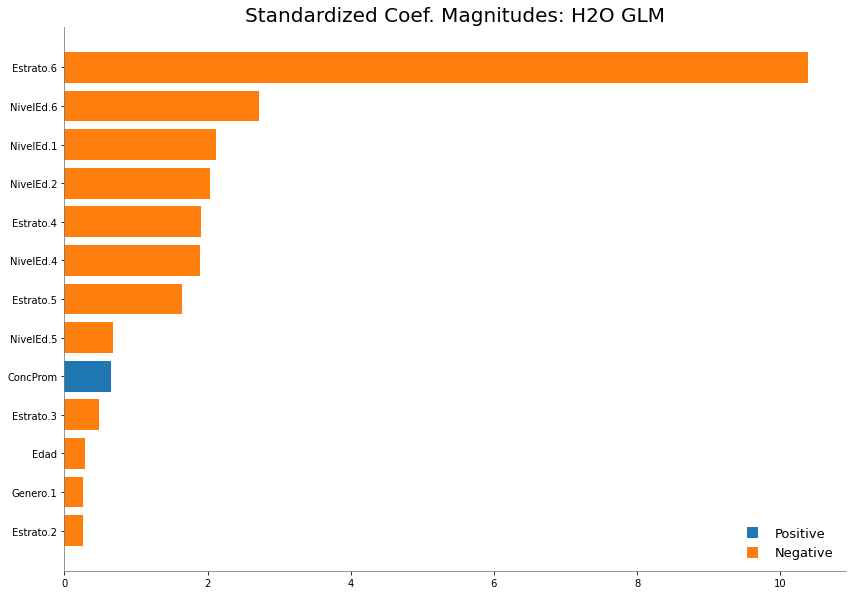

glm prediction progress: |████████████████████████████████████████████████| 100%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.6107784431137725


In [35]:
X = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
y = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')
X = X.drop('ConcProm', axis=1)
X["ConcProm"] =  pd.Series(p_1)
train = X.join(y)
print('train ', train.shape)


train_h = h2o.H2OFrame(train)
train_h["Genero"] = train_h["Genero"].asfactor()
train_h["Estrato"] = train_h["Estrato"].asfactor()
train_h["NivelEd"] = train_h["NivelEd"].asfactor()
train_h["Accidente"] = train_h["Accidente"].asfactor()

predictors = ["Genero","Edad","Estrato","NivelEd","ConcProm"]
response = "Accidente"

glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,
                                          nfolds = 5)
glm_model.train(predictors, response, training_frame= train_h)

print(glm_model)
glm_model.std_coef_plot()
glm_model.save_mojo()

preds = glm_model.predict(train_h)
preds = h2o.as_list(preds)
predicted = np.array(preds["predict"])
y = np.array(train["Accidente"])
print(predicted)
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] == y[i]:
       c= c+1
print(c/len(predicted))



glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1597199301027_19


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,12,12,9,py_4_sid_aa75




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.2313235146935604
RMSE: 0.4809610324065354
LogLoss: 0.6524704715419636
Null degrees of freedom: 166
Residual degrees of freedom: 154
Null deviance: 231.45726319250497
Residual deviance: 217.9251374950158
AIC: 243.9251374950158
AUC: 0.6446197991391679
AUCPR: 0.6404349737877112
Gini: 0.2892395982783358

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4179628484860085: 


,,0,1,Error,Rate
0,0,21.0,61.0,0.7439,(61.0/82.0)
1,1,6.0,79.0,0.0706,(6.0/85.0)
2,Total,27.0,140.0,0.4012,(67.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.417963,0.702222,109.0
1,max f2,0.150136,0.841584,132.0
2,max f0point5,0.525666,0.643045,52.0
3,max accuracy,0.525666,0.634731,52.0
4,max precision,0.869854,1.000000,0.0
5,max recall,0.150136,1.000000,132.0
6,max specificity,0.869854,1.000000,0.0
7,max absolute_mcc,0.480821,0.278184,82.0
8,max min_per_class_accuracy,0.517897,0.611765,60.0
9,max mean_per_class_accuracy,0.525666,0.635796,52.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 151.29 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,1.371461,0.000000,0.000000,0.000000,82.840638,0.000000,82.840638,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,1.275754,0.982353,0.491176,0.500000,1.322155,0.250000,42.081396,0.011765,0.011765,-1.764706,-50.882353,-0.024821
2,3,0.029940,1.247653,0.000000,0.392941,0.000000,1.275654,0.200000,33.920248,0.000000,0.011765,-100.000000,-60.705882,-0.037016
3,4,0.041916,1.234689,0.982353,0.561345,0.500000,1.243301,0.285714,24.583977,0.011765,0.023529,-1.764706,-43.865546,-0.037446
4,5,0.053892,1.222690,1.964706,0.873203,1.000000,1.227535,0.444444,19.393657,0.023529,0.047059,96.470588,-12.679739,-0.013917
5,6,0.101796,0.966830,0.982353,0.924567,0.500000,1.106257,0.470588,10.787822,0.047059,0.094118,-1.764706,-7.543253,-0.015638
6,7,0.149701,0.757960,1.227941,1.021647,0.625000,0.877724,0.520000,7.616590,0.058824,0.152941,22.794118,2.164706,0.006600
7,8,0.209581,0.636619,0.589412,0.898151,0.300000,0.708760,0.457143,5.642924,0.035294,0.188235,-41.058824,-10.184874,-0.043472
8,9,0.299401,0.527246,1.178824,0.982353,0.600000,0.591110,0.500000,4.127380,0.105882,0.294118,17.882353,-1.764706,-0.010760
9,10,0.401198,0.485845,1.040138,0.997015,0.529412,0.502347,0.507463,3.207596,0.105882,0.400000,4.013841,-0.298507,-0.002439




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.28465101697916706
RMSE: 0.5335269599365782
LogLoss: 1.1197079651459276
Null degrees of freedom: 166
Residual degrees of freedom: 154
Null deviance: 232.27099832621195
Residual deviance: 373.9824603586622
AIC: 399.9824603586622
AUC: 0.48228120516499284
AUCPR: 0.49159297082565173
Gini: -0.03543758967001431

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.8320755532062575e-06: 


,,0,1,Error,Rate
0,0,1.0,81.0,0.9878,(81.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,1.0,166.0,0.485,(81.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.000002,0.677291,158.0
1,max f2,0.000002,0.839921,158.0
2,max f0point5,0.000002,0.567423,158.0
3,max accuracy,0.422771,0.526946,129.0
4,max precision,0.674357,0.615385,12.0
5,max recall,0.000002,1.000000,158.0
6,max specificity,0.999999,0.987805,0.0
7,max absolute_mcc,0.999999,0.112092,1.0
8,max min_per_class_accuracy,0.517279,0.475610,79.0
9,max mean_per_class_accuracy,0.422771,0.521306,129.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 14429.89 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,686.348572,0.982353,0.982353,0.500000,686.442395,0.500000,686.442395,0.011765,0.011765,-1.764706,-1.764706,-0.000430
1,2,0.023952,633.608598,0.982353,0.982353,0.500000,659.970823,0.500000,673.206609,0.011765,0.023529,-1.764706,-1.764706,-0.000861
2,3,0.029940,590.290016,0.000000,0.785882,0.000000,633.549846,0.400000,665.275257,0.000000,0.023529,-100.000000,-21.411765,-0.013056
3,4,0.041916,526.250768,0.982353,0.842017,0.500000,557.829192,0.428571,634.576381,0.011765,0.035294,-1.764706,-15.798319,-0.013486
4,5,0.053892,526.048110,1.964706,1.091503,1.000000,526.157355,0.555556,610.483264,0.023529,0.058824,96.470588,9.150327,0.010043
5,6,0.101796,522.965970,1.473529,1.271280,0.750000,524.324751,0.647059,569.938081,0.070588,0.129412,47.352941,27.128028,0.056241
6,7,0.149701,502.652501,1.473529,1.336000,0.750000,515.318639,0.680000,552.459860,0.070588,0.200000,47.352941,33.600000,0.102439
7,8,0.203593,425.831037,0.654902,1.155709,0.333333,459.963823,0.588235,527.975615,0.035294,0.235294,-34.509804,15.570934,0.064562
8,9,0.299401,166.205306,0.982353,1.100235,0.500000,352.221466,0.560000,471.734287,0.094118,0.329412,-1.764706,10.023529,0.061119
9,10,0.401198,3.586384,1.386851,1.172959,0.705882,13.413441,0.597015,355.443923,0.141176,0.470588,38.685121,17.295874,0.141320




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.53080076,0.074831806,0.6333333,0.5294118,0.42307693,0.54545456,0.52272725
1,auc,0.49417895,0.10852774,0.6712963,0.37889272,0.4969697,0.44852942,0.4752066
2,aucpr,0.54317814,0.14602986,0.7793618,0.4021256,0.47356832,0.48325205,0.577583
3,err,0.46919924,0.074831806,0.36666667,0.47058824,0.5769231,0.45454547,0.47727272
4,err_count,15.6,3.5777087,11.0,16.0,15.0,15.0,21.0
5,f0point5,0.5740991,0.06881423,0.67164177,0.5673759,0.47826087,0.5862069,0.5670103
6,f1,0.6796039,0.061363287,0.7659575,0.6666667,0.5945946,0.6938776,0.6769231
7,f2,0.83491576,0.040455893,0.8910891,0.8080808,0.78571427,0.85,0.8396947
8,lift_top_group,1.2060606,1.1282336,1.6666666,0.0,2.3636363,0.0,2.0
9,logloss,1.1165271,0.6387735,0.6519636,1.2693868,0.7182082,2.17233,0.7707472



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-08-12 02:28:38,0.000 sec,0,115.728632,0.692986,,,,,,,
1,,2020-08-12 02:28:38,0.002 sec,1,109.181194,0.653780,,,,,,,
2,,2020-08-12 02:28:38,0.002 sec,2,109.005496,0.652728,,,,,,,
3,,2020-08-12 02:28:38,0.003 sec,3,108.977724,0.652561,,,,,,,
4,,2020-08-12 02:28:38,0.003 sec,4,108.968062,0.652503,,,,,,,
5,,2020-08-12 02:28:38,0.004 sec,5,108.964559,0.652482,,,,,,,
6,,2020-08-12 02:28:38,0.004 sec,6,108.963276,0.652475,,,,,,,
7,,2020-08-12 02:28:38,0.005 sec,7,108.962805,0.652472,,,,,,,
8,,2020-08-12 02:28:38,0.005 sec,8,108.962632,0.652471,,,,,,,
9,,2020-08-12 02:28:38,0.006 sec,9,108.962569,0.652470,0.480961,0.65247,0.0744072,NaN,NaN,0,0.401198


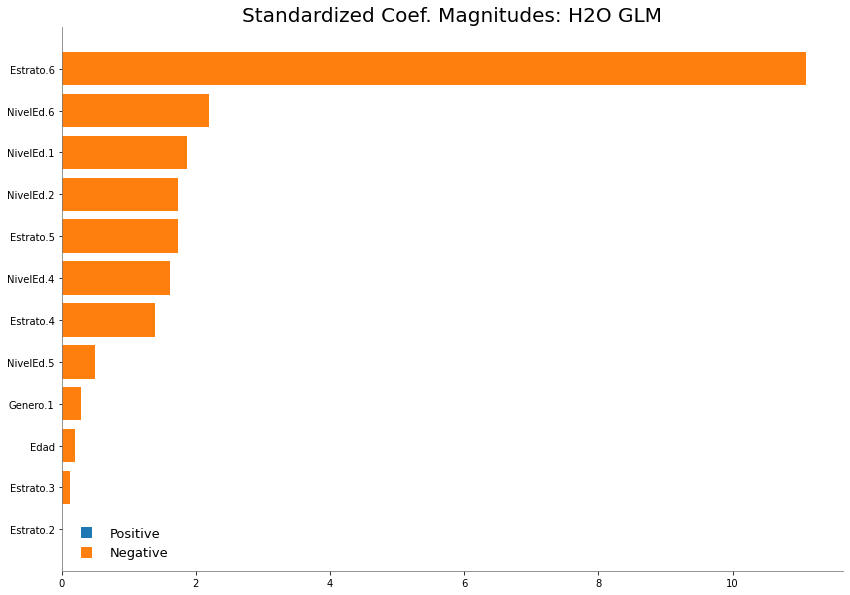

glm prediction progress: |████████████████████████████████████████████████| 100%
[1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.5988023952095808


In [36]:
predictors = ["Genero","Edad","Estrato","NivelEd"]
response = "Accidente"

glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,
                                          nfolds = 5)
glm_model.train(predictors, response, training_frame= train_h)

print(glm_model)
glm_model.std_coef_plot()
preds = glm_model.predict(train_h)
preds = h2o.as_list(preds)
predicted = np.array(preds["predict"])
y = np.array(train["Accidente"])
print(predicted)
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] == y[i]:
       c= c+1
print(c/len(predicted))

glm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1597199301027_37


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,None,1,1,3,py_4_sid_aa75




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.23384161779573356
RMSE: 0.48357172973172613
LogLoss: 0.6591640230859203
Null degrees of freedom: 166
Residual degrees of freedom: 165
Null deviance: 231.45726319250497
Residual deviance: 220.16078371069736
AIC: 224.16078371069736
AUC: 0.6507173601147777
AUCPR: 0.6714322965125255
Gini: 0.3014347202295553

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2310568457634777: 


,,0,1,Error,Rate
0,0,5.0,77.0,0.939,(77.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,5.0,162.0,0.4611,(77.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.231057,0.688259,142.0
1,max f2,0.231057,0.846614,142.0
2,max f0point5,0.531989,0.656168,60.0
3,max accuracy,0.531989,0.646707,60.0
4,max precision,0.666798,0.928571,12.0
5,max recall,0.231057,1.000000,142.0
6,max specificity,0.780717,0.987805,0.0
7,max absolute_mcc,0.604896,0.304521,32.0
8,max min_per_class_accuracy,0.515183,0.646341,68.0
9,max mean_per_class_accuracy,0.531989,0.647776,60.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 22.32 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,0.585464,0.000000,0.000000,0.000000,0.682340,0.000000,0.682340,0.000000,0.000000,-100.000000,-100.000000,-0.024390
1,2,0.023952,0.458151,0.000000,0.000000,0.000000,0.517297,0.000000,0.599818,0.000000,0.000000,-100.000000,-100.000000,-0.048780
2,3,0.029940,0.429786,0.000000,0.000000,0.000000,0.430906,0.000000,0.566036,0.000000,0.000000,-100.000000,-100.000000,-0.060976
3,4,0.041916,0.402589,0.982353,0.280672,0.500000,0.425707,0.142857,0.525942,0.011765,0.011765,-1.764706,-71.932773,-0.061406
4,5,0.053892,0.386617,1.964706,0.654902,1.000000,0.389466,0.333333,0.495614,0.023529,0.035294,96.470588,-34.509804,-0.037877
5,6,0.101796,0.351577,1.473529,1.040138,0.750000,0.368178,0.529412,0.435644,0.070588,0.105882,47.352941,4.013841,0.008321
6,7,0.149701,0.300217,1.473529,1.178824,0.750000,0.321376,0.600000,0.399078,0.070588,0.176471,47.352941,17.882353,0.054519
7,8,0.203593,0.255003,1.309804,1.213495,0.666667,0.270034,0.617647,0.364919,0.070588,0.247059,30.980392,21.349481,0.088522
8,9,0.299401,0.222968,0.982353,1.139529,0.500000,0.238458,0.580000,0.324452,0.094118,0.341176,-1.764706,13.952941,0.085079
9,10,0.407186,0.202352,1.309804,1.184602,0.666667,0.213413,0.602941,0.295059,0.141176,0.482353,30.980392,18.460208,0.153085




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.23636243593278264
RMSE: 0.48617120022969545
LogLoss: 0.6655998612133991
Null degrees of freedom: 166
Residual degrees of freedom: 165
Null deviance: 232.13265842772836
Residual deviance: 222.3103536452753
AIC: 226.3103536452753
AUC: 0.6454088952654232
AUCPR: 0.6685506775685014
Gini: 0.29081779053084644

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2066280908292137: 


,,0,1,Error,Rate
0,0,4.0,78.0,0.9512,(78.0/82.0)
1,1,0.0,85.0,0.0,(0.0/85.0)
2,Total,4.0,163.0,0.4671,(78.0/167.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.206628,0.685484,159.0
1,max f2,0.206628,0.844930,159.0
2,max f0point5,0.553291,0.653495,58.0
3,max accuracy,0.553291,0.640719,58.0
4,max precision,0.674225,0.928571,13.0
5,max recall,0.206628,1.000000,159.0
6,max specificity,0.828488,0.987805,0.0
7,max absolute_mcc,0.553291,0.297321,58.0
8,max min_per_class_accuracy,0.513849,0.623529,79.0
9,max mean_per_class_accuracy,0.553291,0.643185,58.0



Gains/Lift Table: Avg response rate: 50.90 %, avg score: 137.38 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011976,2.685360,1.964706,1.964706,1.000000,3.423446,1.000000,3.423446,0.023529,0.023529,96.470588,96.470588,0.023529
1,2,0.023952,2.425530,1.964706,1.964706,1.000000,2.453640,1.000000,2.938543,0.023529,0.047059,96.470588,96.470588,0.047059
2,3,0.029940,2.230559,1.964706,1.964706,1.000000,2.382072,1.000000,2.827249,0.011765,0.058824,96.470588,96.470588,0.058824
3,4,0.041916,2.190837,1.964706,1.964706,1.000000,2.213146,1.000000,2.651791,0.023529,0.082353,96.470588,96.470588,0.082353
4,5,0.053892,2.140975,0.000000,1.528105,0.000000,2.177515,0.777778,2.546396,0.000000,0.082353,-100.000000,52.810458,0.057963
5,6,0.101796,1.828112,1.473529,1.502422,0.750000,1.959525,0.764706,2.270222,0.070588,0.152941,47.352941,50.242215,0.104161
6,7,0.149701,1.716113,0.982353,1.336000,0.500000,1.797536,0.680000,2.118962,0.047059,0.200000,-1.764706,33.600000,0.102439
7,8,0.203593,1.671667,0.654902,1.155709,0.333333,1.687116,0.588235,2.004650,0.035294,0.235294,-34.509804,15.570934,0.064562
8,9,0.299401,1.377803,0.859559,1.060941,0.437500,1.528115,0.540000,1.852159,0.082353,0.317647,-14.044118,6.094118,0.037159
9,10,0.401198,1.320136,0.808997,0.997015,0.411765,1.349464,0.507463,1.724609,0.082353,0.400000,-19.100346,-0.298507,-0.002439




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.6471428,0.10172145,0.5277778,0.6857143,0.7222222,0.55,0.75
1,auc,0.6458099,0.0801871,0.5325077,0.71732026,0.65,0.6052632,0.7239583
2,aucpr,0.68409777,0.07675787,0.61083484,0.7414036,0.6678618,0.6161293,0.7842594
3,err,0.35285714,0.10172145,0.4722222,0.31428573,0.2777778,0.45,0.25
4,err_count,12.2,5.3572383,17.0,11.0,10.0,18.0,5.0
5,f0point5,0.66020846,0.0748991,0.5828221,0.6666667,0.6944444,0.59322035,0.7638889
6,f1,0.7180679,0.057153556,0.6909091,0.71794873,0.6666667,0.7,0.8148148
7,f2,0.7987384,0.09525478,0.84821427,0.7777778,0.64102566,0.85365856,0.8730159
8,lift_top_group,0.7122807,0.9786581,1.8947369,0.0,0.0,0.0,1.6666666
9,logloss,0.66104805,0.04304418,0.70139146,0.61322594,0.6521728,0.7097477,0.6287025



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-08-12 02:28:42,0.000 sec,0,115.728632,0.692986,,,,,,,
1,,2020-08-12 02:28:42,0.001 sec,1,110.126276,0.659439,,,,,,,
2,,2020-08-12 02:28:42,0.002 sec,2,110.080415,0.659164,,,,,,,
3,,2020-08-12 02:28:42,0.002 sec,3,110.080392,0.659164,0.483572,0.659164,0.0643316,NaN,NaN,0,0.461078


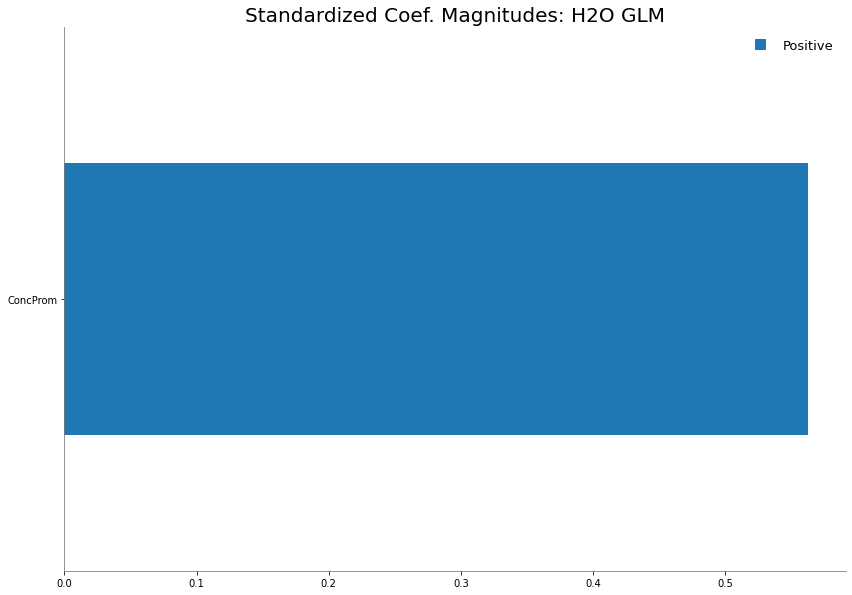

glm prediction progress: |████████████████████████████████████████████████| 100%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0]
0.5389221556886228


In [37]:
predictors = ["ConcProm"]
response = "Accidente"

glm_model = H2OGeneralizedLinearEstimator(family= "binomial",
                                          lambda_ = 0,
                                          compute_p_values = True,
                                          nfolds = 5)
glm_model.train(predictors, response, training_frame= train_h)

print(glm_model)
glm_model.std_coef_plot()
preds = glm_model.predict(train_h)
preds = h2o.as_list(preds)
predicted = np.array(preds["predict"])
y = np.array(train["Accidente"])
print(predicted)
print(y)
c = 0
for i in range(len(predicted)): 
    if predicted[i] == y[i]:
       c= c+1
print(c/len(predicted))

In [ ]:
from h2o.automl import H2OAutoML

predictors = ["Genero","Edad","Estrato","NivelEd","ConcProm"]
response = "Accidente"
aml = H2OAutoML(max_models=200, seed=1)
aml.train(x=predictors, y=response, training_frame=train_h)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |██████████
02:29:04.891: Skipping training of model GBM_5_AutoML_20200812_022849 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20200812_022849.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.


█████████████████████████████████████████

In [62]:
predictors = ["Genero","Edad","Estrato","NivelEd"]
response = "Accidente"
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=predictors, y=response, training_frame=train_h,max_models = 200, max_runtime_secs =3600)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |██████████
23:38:06.216: Skipping training of model GBM_5_AutoML_20200811_233757 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20200811_233757.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 167.0.


██████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XGBoost_grid__1_AutoML_20200811_233757_model_3,0.591822,0.695277,0.627296,0.5,0.500307,0.250307
GBM_1_AutoML_20200811_233757,0.57561,0.787447,0.594297,0.493902,0.528103,0.278893
GBM_2_AutoML_20200811_233757,0.560617,0.706151,0.584098,0.462339,0.505223,0.25525
DeepLearning_grid__1_AutoML_20200811_233757_model_1,0.554232,0.821533,0.552891,0.493902,0.532483,0.283538
XGBoost_grid__1_AutoML_20200811_233757_model_5,0.551291,0.729073,0.578107,0.474964,0.514104,0.264303
DRF_1_AutoML_20200811_233757,0.550287,0.799467,0.616737,0.48759,0.538031,0.289477
GBM_3_AutoML_20200811_233757,0.54878,0.715417,0.567613,0.462123,0.509624,0.259716
XGBoost_grid__1_AutoML_20200811_233757_model_4,0.547991,0.709997,0.598086,0.5,0.507346,0.257399
StackedEnsemble_BestOfFamily_AutoML_20200811_233757,0.543902,0.698538,0.569704,0.5,0.502335,0.252341
GBM_grid__1_AutoML_20200811_233757_model_1,0.53759,0.704657,0.551565,0.48759,0.505093,0.255119


In [ ]:
predictors = ["ConcProm"]
response = "Accidente"
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=predictors, y=response, training_frame=train_h,max_models = 200, max_runtime_secs =3600)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

In [ ]:
h2o.ls()
h2o.shutdown()

In [ ]:
# Import the tpot classifier 
from tpot import TPOTClassifier 

# Create a tpot object with a few parameters
tpot = TPOTClassifier(scoring = 'accuracy', 
                    max_time_mins = 20, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5)

In [ ]:
# Fit the tpot model on the training data
tpot.fit(X, y)

In [ ]:
# Evaluate the final model 
print(tpot.score(X, y))

In [ ]:
print(tpot.fitted_pipeline_)


In [ ]:
tpot_best_model = tpot.fitted_pipeline_[0]

cross_val5 = cross_val_score(tpot_best_model, X, y, scoring='accuracy', cv=5)
print(cross_val5)
print(cross_val5.mean())

cross_val10 = cross_val_score(tpot_best_model, X, y, scoring='accuracy', cv=10)
print(cross_val10)
print(cross_val10.mean())

In [ ]:
# Export the pipeline as a python script file
tpot.export('tpot_exported_pipeline.py')

In a run TPOT produced DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=14, min_samples_split=20)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
# https://scikit-learn.org/stable/modules/compose.html#combining-estimators
from sklearn.tree import DecisionTreeClassifier
features =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
target =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=14, min_samples_split=20)

exported_pipeline.fit(features, target)

features=np.array(features)

estimator = exported_pipeline
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = estimator.decision_path(features)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = estimator.apply(features)

# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

for sample_id in range(6):
  node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                      node_indicator.indptr[sample_id + 1]]

  print('\nRules used to predict sample %s: ' % sample_id)
  for node_id in node_index:
      if leave_id[sample_id] == node_id:
          continue

      if (features[sample_id, feature[node_id]] <= threshold[node_id]):
          threshold_sign = "<="
      else:
          threshold_sign = ">"

      print("decision id node %s : (X_test[%s, %s] (= %s) %s %s)"
            % (node_id,
              sample_id,
              feature[node_id],
              features[sample_id, feature[node_id]],
              threshold_sign,
              threshold[node_id]))

# For a group of samples, we have the following common node.
sample_ids = [0,1,2,3,3,4,5]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                  len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
        % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))

To save the pipeline for future use, we can export it to a Python script. 

Since we are in a Google Colab notebook, this will save it on the server where our notebook is running and the file  will only persist while we are connected. To download the pipeline onto a local machine from Google's servers, we have to use the file helper functions (from `gooogle.colab`) to download it. 

The file can be [accessed on GitHub](https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/auto_ml/tpot_exported_pipeline.py).

If we want to look at all of the evaluated pipelines, we can see the `.evaluated_individuals_` attribute of the fitted optimizer. Be careful about running this as it will print out all 1500 pipelines that were tested!

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
features =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX_DP.csv')
target =  pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

# Average CV score on the training set was: 1.0
exported_pipeline = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=14, min_samples_split=20)

exported_pipeline.fit(features, target)

cross_val5 = cross_val_score(exported_pipeline, X, y, scoring='accuracy', cv=5)
print(cross_val5)
print(cross_val5.mean())

cross_val10 = cross_val_score(exported_pipeline, X, y, scoring='accuracy', cv=10)
print(cross_val10)
print(cross_val10.mean())
